In [14]:
# Import math functions from NumPy
from numpy import *
# Import plotting functions from helper
from CQR_excersice.pythonLab2.helper import plot_probability, plot_binomial_tree, plot_asset_path

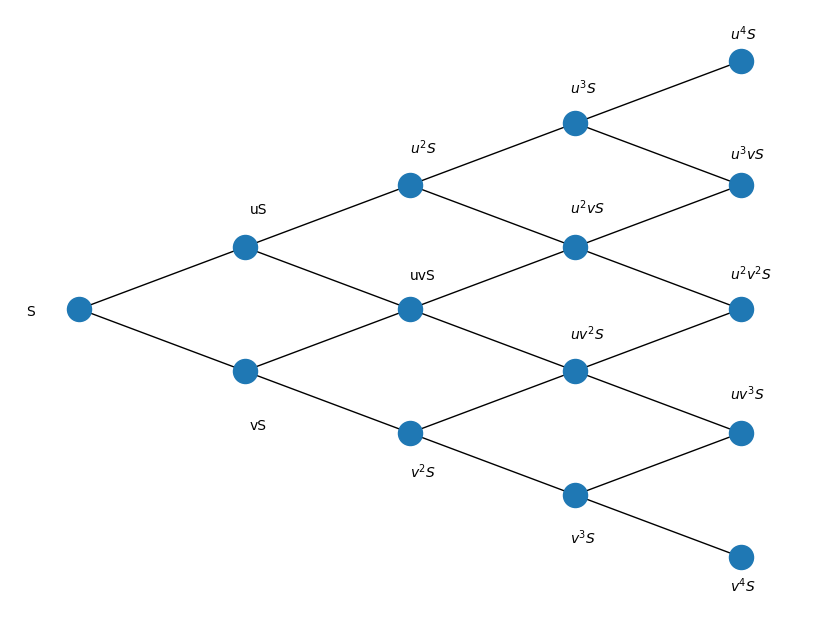

In [15]:
# Plot asset price path
plot_asset_path()

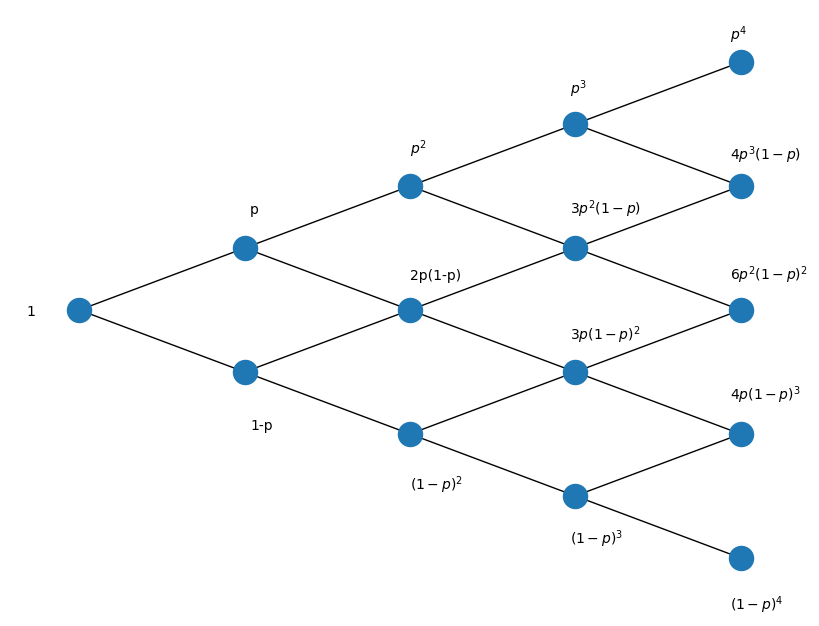

In [16]:
# Plot node probability
plot_probability()


In [17]:
# Create a user defined function
def binomial_option(spot, strike, rate, sigma, time, steps, output=0):
    """
    binomial_option(spot, strike, rate, sigma, time, steps, output=0)
    Function for building binomial option tree for european call option payoff
    Params
    ------
    spot int or float - spot price
    strike int or float - strike price
    rate float - interest rate
    sigma float - volatility
    time int or float - expiration time
    steps int - number of trees
    output int - [0: price, 1: payoff, 2: option value, 3:option delta]

    Returns
    -------
    out: ndarray
    An array object of price, payoff, option value and delta specified by the output parameter
"""
    # params
    ts = time/steps
    u = 1+sigma*sqrt(ts)
    v = 1- sigma*sqrt(ts)
    p = 0.5+rate*sqrt(ts)/(2*sigma)
    df = 1/(1+rate*ts)
    # initialize arrays
    px = zeros((steps+1, steps+1))
    cp = zeros((steps+1, steps+1))
    V = zeros((steps+1, steps+1))
    d = zeros((steps+1, steps+1))
    # binomial loop
    # forward loop
    for j in range(steps+1):
        for i in range(j+1):
            px[i,j] = spot*power(v,i)*power(u,j-i)
            cp[i,j] = maximum(px[i,j]-strike, 0)
    # reverse loop
    for j in range(steps+1, 0, -1):
        for i in range(j):
            if j==steps+1:
                V[i,j-1] = cp[i,j-1]
                d[i,j-1] = 0
            else:
                V[i,j-1] = df*(p*V[i,j]+(1-p)*V[i+1,j])
                d[i,j-1] = (V[i,j]-V[i+1,j])/(px[i,j]-px[i+1,j])
    results = around(px,2), around(cp,2), around(V,2), around(d,4)
    return results[output]


In [18]:
# Asset price
px = binomial_option(100,100,0.05,0.2,1,4,0)
px


array([[100.  , 110.  , 121.  , 133.1 , 146.41],
       [  0.  ,  90.  ,  99.  , 108.9 , 119.79],
       [  0.  ,   0.  ,  81.  ,  89.1 ,  98.01],
       [  0.  ,   0.  ,   0.  ,  72.9 ,  80.19],
       [  0.  ,   0.  ,   0.  ,   0.  ,  65.61]])

In [19]:
# Intrinsic value of call options
cp = binomial_option(100,100,0.05,0.2,1,4,1)
cp

array([[ 0.  , 10.  , 21.  , 33.1 , 46.41],
       [ 0.  ,  0.  ,  0.  ,  8.9 , 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [20]:
# Option price
opx = binomial_option(100,100,0.05,0.2,1,4,2)
opx

array([[10.29, 15.88, 23.83, 34.33, 46.41],
       [ 0.  ,  3.39,  6.11, 10.99, 19.79],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [21]:
# Option delta
d = binomial_option(100,100,0.05,0.2,1,4,3)
d

array([[0.6241, 0.8053, 0.9645, 1.    , 0.    ],
       [0.    , 0.3393, 0.5553, 0.9086, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    ]])

In [22]:
# Binomial Option Price
print(f"European Call Option Price using Binomial Tree Method: {opx[0,0]:.2f}")


European Call Option Price using Binomial Tree Method: 10.29


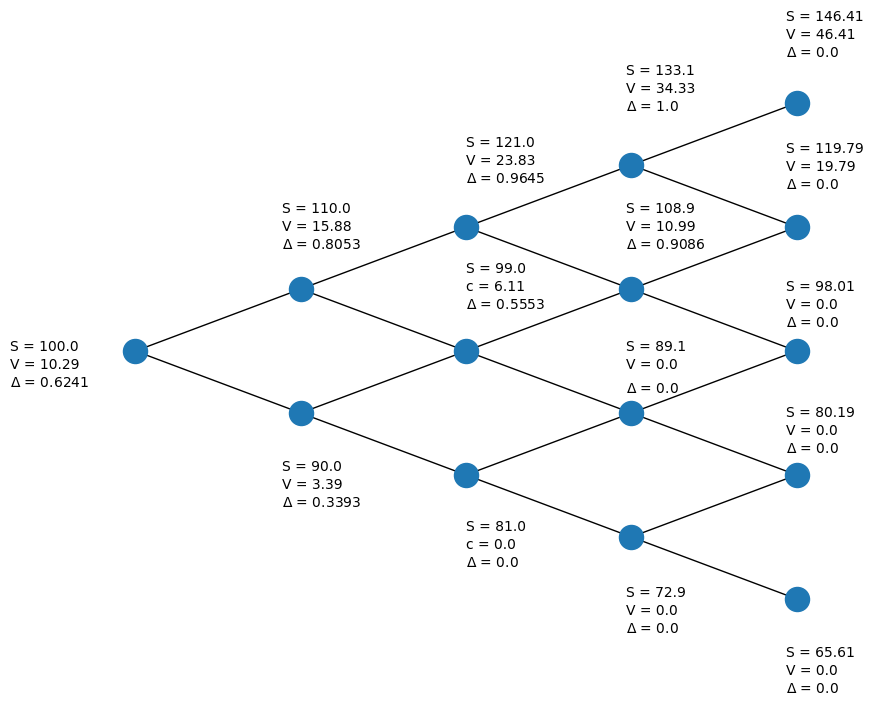

In [23]:
# Plot a 4-Step Binomial Tree
plot_binomial_tree(px[0,0], px, opx, d)